# Convolution Neural Network

In [1]:
# Import libraries
from tensorflow.examples.tutorials.mnist import input_data as mnist_data
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
# Set variables
train_step_num = 100
learning_rate = 0.001
batch_size = 100
test_interval = 10
keep_rate = 0.5
stddev = 0.1
rand_seed = 0
constant = 0.1
conv_stride = [1, 1, 1, 1]
pool_stride= [1, 2, 2, 1]
ksize = [1, 2, 2, 1]

In [3]:
# Download mnist data
mnist = mnist_data.read_data_sets("../data/mnist", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ../data/mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ../data/mnist/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ../data/mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ../data/mnist/t10k-labels-idx1-ubyte.gz


In [4]:
# Create symbolic variables
x = tf.placeholder("float", shape=[None, 784])
x_image = tf.reshape(x, [-1, 28, 28, 1])
y_label = tf.placeholder("float", shape=[None, 10])

In [5]:
# Create functions for variable
def get_init_weight(shape):
    init_weight = tf.truncated_normal(shape, stddev=stddev, seed=rand_seed)
    return tf.Variable(init_weight)

def get_init_bias(shape):
    init_bias = tf.constant(constant, shape=shape)
    return tf.Variable(init_bias)

In [6]:
# Create functions for calculation
def conv2d(x, w):
    return tf.nn.conv2d(x, w, strides=conv_stride, padding="SAME")
def max_pool(x):
    return tf.nn.max_pool(x, ksize=ksize, strides=pool_stride, padding="SAME")

In [7]:
# Convolution and pooling 1st
w_conv1 = get_init_weight([5, 5, 1, 32])
b_conv1 = get_init_bias([32])
h_conv1 = tf.nn.relu(conv2d(x_image, w_conv1) + b_conv1)
h_pool1 = max_pool(h_conv1)

In [8]:
# Convolution and pooling 2nd
w_conv2 = get_init_weight([5, 5, 32, 64])
b_conv2 = get_init_bias([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, w_conv2) + b_conv2)
h_pool2 = max_pool(h_conv2)

In [9]:
# Fully connected 1st
w_fc1 = get_init_weight([7*7*64, 1024])
b_fc1 = get_init_bias([1024])
h_pool2_reshape = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_reshape, w_fc1) + b_fc1)

In [10]:
# Fully connected 2nd
w_fc2 = get_init_weight([1024, 10])
b_fc2 = get_init_bias([10])
keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
y_pred = tf.nn.softmax(tf.matmul(h_fc1_drop, w_fc2) + b_fc2)

In [11]:
# Use cross entroy error for loss
loss = -tf.reduce_sum(y_label * tf.log(y_pred))

In [12]:
# Set train
train = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [13]:
# Set accuracy
y_equal = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_label, 1))
accuracy = tf.reduce_mean(tf.cast(y_equal, "float"))

In [14]:
# Init and create session
init_op = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init_op)

In [15]:
# Train
step_accuracy_list = []
for step in range(train_step_num):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x: batch_x, y_label: batch_y, keep_prob: keep_rate})
    if step % test_interval == 0:
        train_accuracy = sess.run(accuracy, feed_dict={x: batch_x, y_label: batch_y, keep_prob: 1.0})
        step_accuracy_list.append((step, train_accuracy))
        print("Step: {}, Train accuracy: {}".format(step, train_accuracy))

Step: 0, Train accuracy: 0.15000000596046448
Step: 10, Train accuracy: 0.47999998927116394
Step: 20, Train accuracy: 0.699999988079071
Step: 30, Train accuracy: 0.8600000143051147
Step: 40, Train accuracy: 0.9100000262260437
Step: 50, Train accuracy: 0.9300000071525574
Step: 60, Train accuracy: 0.8899999856948853
Step: 70, Train accuracy: 0.9300000071525574
Step: 80, Train accuracy: 0.9200000166893005
Step: 90, Train accuracy: 0.9399999976158142


In [16]:
# Calculate accuracy
test_accuracy = sess.run(accuracy, feed_dict={x:mnist.test.images, y_label: mnist.test.labels, keep_prob: 1.0})
step_accuracy_list.append((train_step_num, test_accuracy))
print("Accuracy: {}".format(test_accuracy))

Accuracy: 0.9539999961853027


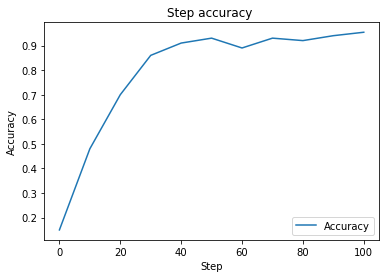

In [17]:
# Draw graph
step_list = [step_accuracy[0] for step_accuracy in step_accuracy_list]
accuracy_list = [step_accuracy[1] for step_accuracy in step_accuracy_list]
plt.plot(step_list, accuracy_list)
plt.legend(["Accuracy"], loc=4)
plt.xlabel("Step")
plt.ylabel("Accuracy")
plt.title("Step accuracy ")